In [5]:
!pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=bffd6fe8409c108e51afe9cdb300ed900ffc84395b21f100b463cfd9e2bdb636
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

Ejercicio 1.

In [13]:
ruta = "/content/drive/My Drive/IABD/PIA/Tema 2/python/dataset/credit_card_data.ods"
drive.mount('/content/drive')

transacciones, cardHolder = [valor for valor in (pd.read_excel(ruta, engine = "odf", sheet_name=None)).values()]

print(transacciones)
print(cardHolder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    CardID TransactionID        Date  Amount   Merchant
0      101         T1001  2024-01-01      50     Amazon
1      101         T1002  2024-01-02      30  Starbucks
2      102         T1003  2024-01-01     100    Walmart
3      102         T1004  2024-01-02     200    BestBuy
4      101         T1005  2024-01-03      50     Amazon
5      103         T1006  2024-01-04      40     Amazon
6      102         T1007  2024-01-03     100    Walmart
7      102         T1008  2024-01-04     200    BestBuy
8      101         T1009  2024-01-01      50       ebay
9      103         T1010  2024-01-02      30  Starbucks
10     103         T1011  2024-01-03     100       ebay
11     102         T1012  2024-01-04     200    BestBuy
   CardID            Name                 Email  CreditLimit
0     101        John Doe    john.doe@gmail.com         5000
1     102      Jane S

Ejercicio 2.

In [53]:
def agruparDataframes(transacciones, cardHolder):
  listaCompras = list()
  compras101 = transacciones[transacciones['CardID'] == 101]['Amount']
  compras102 = transacciones[transacciones['CardID'] == 102]['Amount']
  compras103 = transacciones[transacciones['CardID'] == 103]['Amount']
  aux = 0
  for compra1 in compras101:
    aux += compra1
  listaCompras.append(aux)
  aux = 0
  for compra2 in compras102:
    aux += compra2
  listaCompras.append(aux)
  aux = 0
  for compra3 in compras103:
    aux += compra3
  listaCompras.append(aux)
  cardHolder['TotalTransactions'] = listaCompras
  return cardHolder

print(agruparDataframes(transacciones, cardHolder))


   CardID            Name                 Email  CreditLimit  \
0     101        John Doe    john.doe@gmail.com         5000   
1     102      Jane Smith  jane.smith@yahoo.com         3000   
2     103  Armando Bronca   tranqui@hotmail.com         2000   

   TotalTransactions  
0                180  
1                800  
2                170  


Ejercicio 3.

In [122]:
def transaccionesMerchant(transacciones, cardHolder):
  merchantDiferente = []
  for columna in transacciones["Merchant"]:
    if columna not in merchantDiferente:
      merchantDiferente.append(columna)
  objetoContar = {}
  for i in merchantDiferente:
    total = transacciones[transacciones['Merchant'] == i]
    objetoContar[i] = [len(total), total['Amount'].sum()]

  df = pd.DataFrame(merchantDiferente, columns=["Merchant"])
  df["TotalTransactions"] = [valor[1] for valor in objetoContar.values()]
  df["CountTransactions"] = [valor[0] for valor in objetoContar.values()]
  return df

print(transaccionesMerchant(transacciones, cardHolder))

    Merchant  TotalTransactions  CountTransactions
0     Amazon                140                  3
1  Starbucks                 60                  2
2    Walmart                200                  2
3    BestBuy                600                  3
4       ebay                150                  2


Ejercicio 4.

<Axes: >

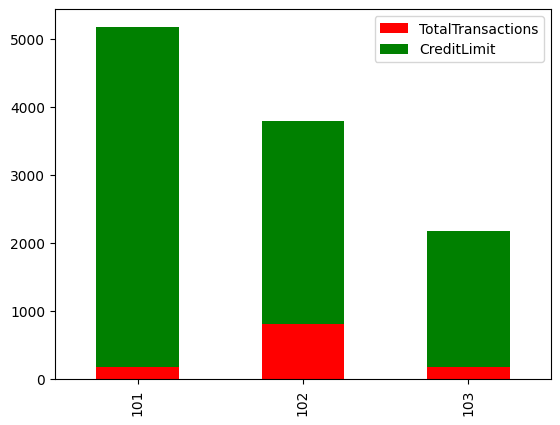

In [95]:
def agruparDataframes(transacciones, cardHolder):
  listaCompras = list()
  compras101 = transacciones[transacciones['CardID'] == 101]['Amount']
  compras102 = transacciones[transacciones['CardID'] == 102]['Amount']
  compras103 = transacciones[transacciones['CardID'] == 103]['Amount']
  aux = 0
  for compra1 in compras101:
    aux += compra1
  listaCompras.append(aux)
  aux = 0
  for compra2 in compras102:
    aux += compra2
  listaCompras.append(aux)
  aux = 0
  for compra3 in compras103:
    aux += compra3
  listaCompras.append(aux)
  cardHolder['TotalTransactions'] = listaCompras
  return cardHolder

df = agruparDataframes(transacciones, cardHolder)
df[["TotalTransactions", "CreditLimit", "CardID"]].plot.bar(x="CardID", xlabel="", stacked=True, color=["red", "green"])

Ejercicio 5.

<Axes: >

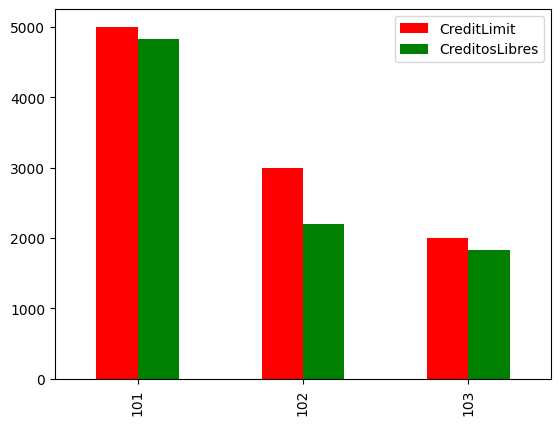

In [99]:
def creditosGastados(transacciones, cardHolder):
  totalCompras = transacciones.groupby('CardID').sum()['Amount']
  cardHolder["CreditosLibres"] = cardHolder['CreditLimit'] - list(totalCompras)
  return cardHolder

df = creditosGastados(transacciones, cardHolder)
df[["CreditLimit", "CreditosLibres", "CardID"]].plot.bar(x="CardID", xlabel="", color=["red", "green"])